In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Import Libraries

This step imports the required Python libraries for data analysis and visualization.



In [36]:
df = pd.read_csv('superstore.csv')
df.head()


,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


## Load Dataset

The dataset is loaded to begin exploratory data analysis.


In [37]:
df.shape
df.dtypes
df.isnull().sum()


,0
Category,0
City,0
Country,0
Customer.ID,0
Customer.Name,0
Discount,0
Market,0
记录数,0
Order.Date,0
Order.ID,0


## Data Exploration

This step checks the structure, size, and missing values in the dataset.


In [38]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)


## Data Cleaning

This step removes duplicates, fills missing values, and handles outliers.


In [39]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

# Select only numeric columns for outlier detection
df_numeric_cols = df.select_dtypes(include=np.number)

# Calculate the outlier mask for numeric columns
outlier_mask = ((df_numeric_cols < (Q1 - 1.5 * IQR)) | (df_numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter the original DataFrame based on the outlier mask
df = df[~outlier_mask]

## Outlier Detection

Outliers are detected using the Interquartile Range (IQR) method.


In [40]:
df.describe()


,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,36311.000000,36311.0,36311.000000,36311.000000,36311.00000,36311.000000,36311.000000,36311.000000,36311.000000
mean,0.091622,1.0,14.340764,3.105670,24854.88929,96.411198,9.534866,2012.784445,31.303655
std,0.148513,0.0,23.581944,1.875963,14682.63600,100.297029,10.700265,1.096574,14.407371
min,0.000000,1.0,-55.125000,1.000000,1.00000,1.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,1.980000,2.000000,12064.00000,27.000000,2.220000,2012.000000,20.000000
50%,0.000000,1.0,8.790000,3.000000,24855.00000,59.000000,5.480000,2013.000000,33.000000
75%,0.200000,1.0,23.790000,4.000000,37303.50000,131.000000,12.650000,2014.000000,44.000000
max,0.500000,1.0,91.995400,9.000000,51290.00000,581.000000,57.200000,2014.000000,53.000000


## Statistical Analysis

Basic statistical measures are calculated to understand data distribution.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


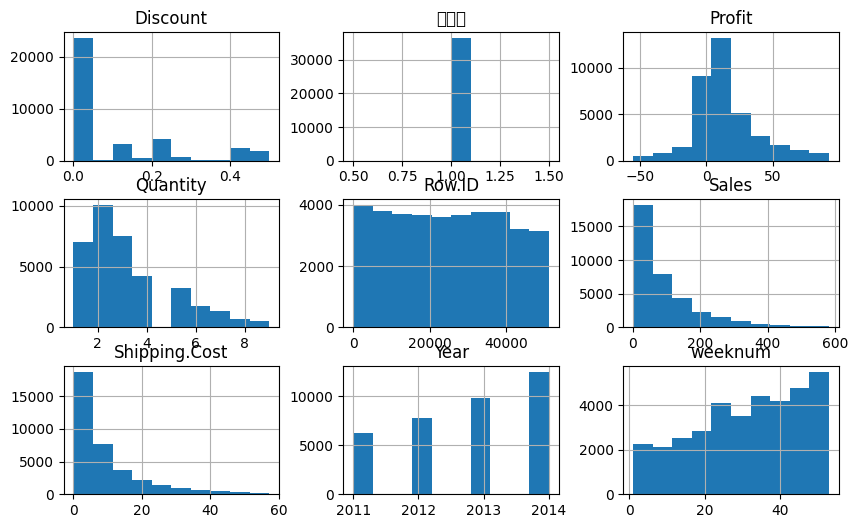

In [41]:
df.hist(figsize=(10,6))
plt.show()


### Histogram

This shows the distribution of numerical values.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


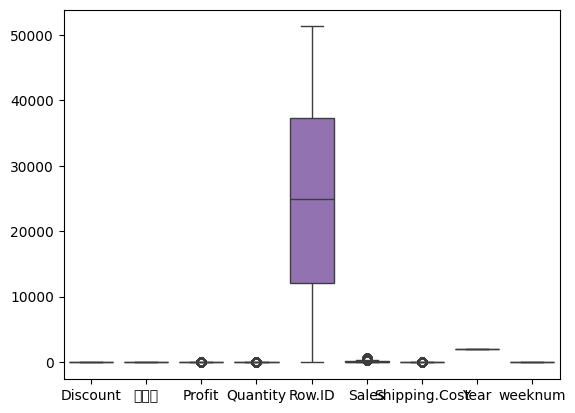

In [42]:
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.show()


### Boxplot

This helps identify outliers in numerical data.


/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:15

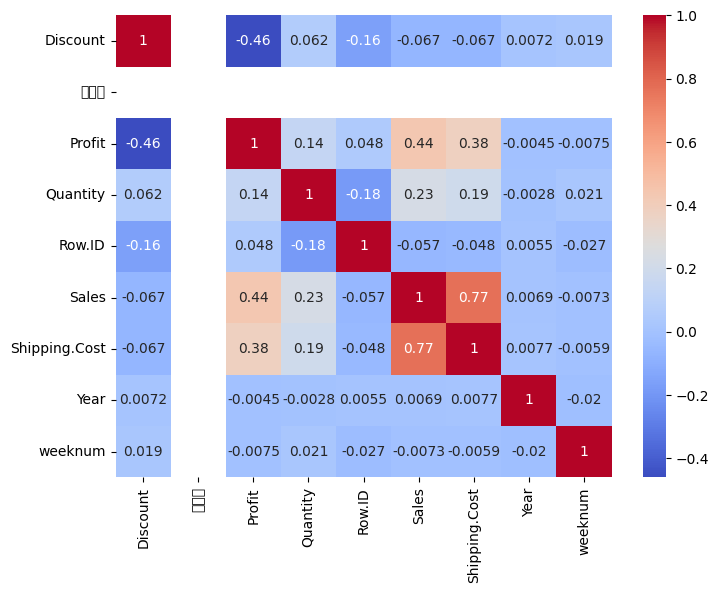

In [43]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.show()

### Correlation Heatmap

This shows relationships between numerical variables.


# Project-2: Sales Performance Analysis


In [44]:
sales_df = pd.read_csv('sales_data.csv')
sales_df.head()


,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


## Load Sales Dataset

The sales dataset is loaded for performance analysis.


In [45]:
sales_df.shape
sales_df.dtypes
sales_df.isnull().sum()


,0
Product_ID,0
Sale_Date,0
Sales_Rep,0
Region,0
Sales_Amount,0
Quantity_Sold,0
Product_Category,0
Unit_Cost,0
Unit_Price,0
Customer_Type,0


## Data Exploration

This step checks size, missing values, and data types.


In [46]:
sales_df.drop_duplicates(inplace=True)
sales_df.fillna(sales_df.median(numeric_only=True), inplace=True)

sales_df['Sale_Date'] = pd.to_datetime(sales_df['Sale_Date'])

## Data Cleaning

Duplicates are removed, missing values handled, and date converted.


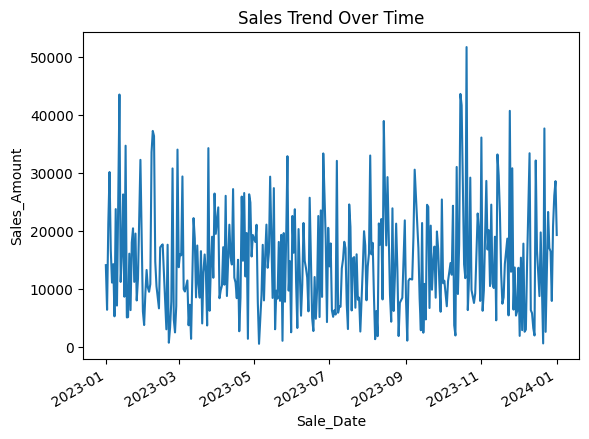

In [47]:
sales_df.groupby('Sale_Date')['Sales_Amount'].sum().plot()
plt.xlabel('Sale_Date')
plt.ylabel('Sales_Amount')
plt.title('Sales Trend Over Time')
plt.show()

## Sales Trend Over Time

This shows how sales change over time.


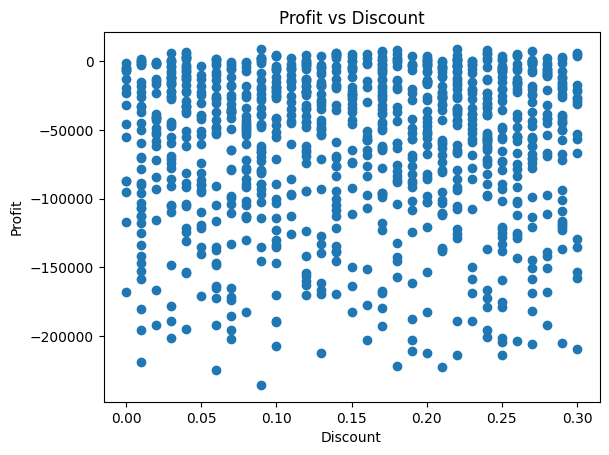

In [48]:
sales_df['Profit'] = sales_df['Sales_Amount'] - (sales_df['Unit_Cost'] * sales_df['Quantity_Sold'])
plt.scatter(sales_df['Discount'], sales_df['Profit'])
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs Discount')
plt.show()

## Profit vs Discount

This shows the relationship between discount and profit.


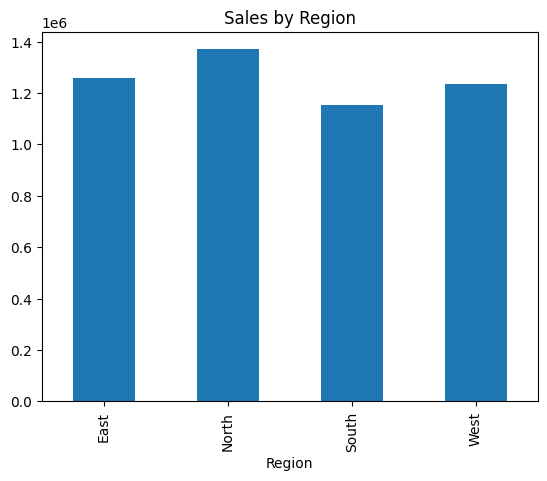

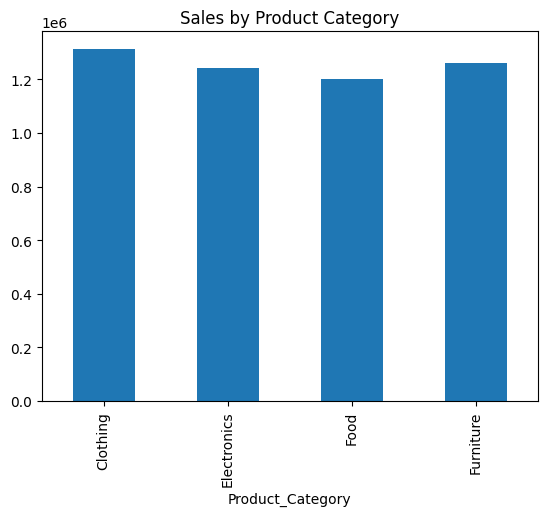

In [49]:
sales_df.groupby('Region')['Sales_Amount'].sum().plot(kind='bar')
plt.title('Sales by Region')
plt.show()

sales_df.groupby('Product_Category')['Sales_Amount'].sum().plot(kind='bar')
plt.title('Sales by Product Category')
plt.show()

## Sales by Region and Category

This compares sales across regions and categories.


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = sales_df[['Profit', 'Discount']]
y = sales_df['Sales_Amount']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2_score(y, y_pred), mean_squared_error(y, y_pred)

(0.006639317808157852, 8042357.159573542)

## Predictive Modeling

A linear regression model is used to predict sales.


## Insights and Recommendations

The analysis highlights key sales trends, discount impacts, and top-performing regions.
The predictive model helps estimate sales and supports data-driven business decisions.
